In [ ]:
import numpy as np

np.random.seed(0)

# True parameters
theta_true = 2.0
mu_true = 1.0
sigma_true = 0.5

# Simulation settings
dt = 0.01
T = 5.0
N = int(T / dt)

# Simulate OU process (Eualer–Maruyma)
X = np.zeros(N)
X[0] = 0.0

for i in range(1, N):
    X[i] = (
        X[i-1]
        + theta_true * (mu_true - X[i-1]) * dt
        + sigma_true * np.sqrt(dt) * np.random.randn()
    )


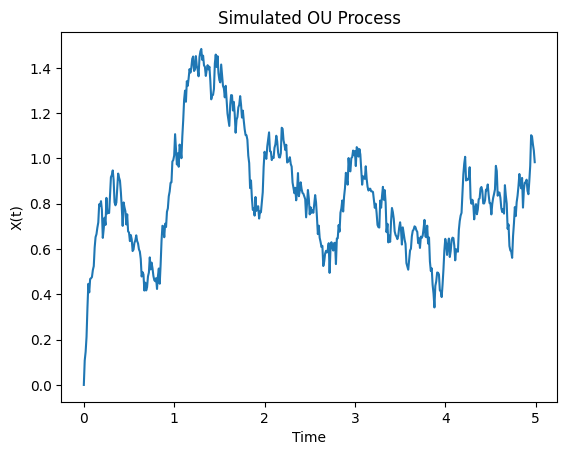

In [7]:
from scipy.optimize import minimize

def neg_log_likelihood(params, X, dt):
    theta, mu, sigma = params

    # Enforce positivity
    if theta <= 0 or sigma <= 0:
        return np.inf

    exp_term = np.exp(-theta * dt)
    var = sigma**2 / (2 * theta) * (1 - exp_term**2)

    ll = 0.0
    for k in range(len(X) - 1):
        mean = X[k] * exp_term + mu * (1 - exp_term)
        ll += 0.5 * (
            np.log(2 * np.pi * var)
            + (X[k+1] - mean)**2 / var
        )

    return ll

# plot the simulated data
import matplotlib.pyplot as plt
plt.plot(np.arange(N) * dt, X)
plt.xlabel('Time')
plt.ylabel('X(t)')
plt.title('Simulated OU Process')
plt.show()

True parameters:
2.0 1.0 0.5

Estimated parameters:
2.919172240352131 0.9068389959757146 0.506354221899821


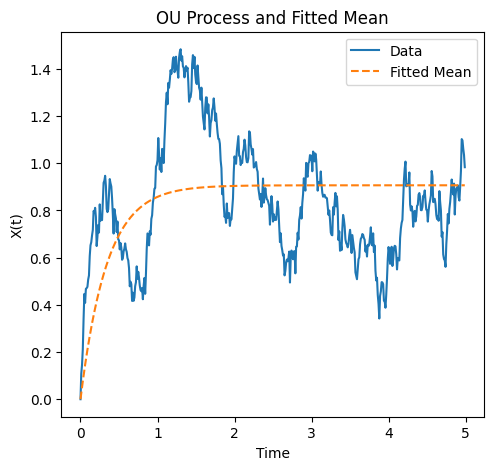

In [10]:
initial_guess = [1.0, 0.0, 1.0]

result = minimize(
    neg_log_likelihood,
    initial_guess,
    args=(X, dt),
    method="L-BFGS-B",
    bounds=[(1e-6, None), (None, None), (1e-6, None)]
)

theta_hat, mu_hat, sigma_hat = result.x

print("True parameters:")
print(theta_true, mu_true, sigma_true)

print("\nEstimated parameters:")
print(theta_hat, mu_hat, sigma_hat)

# plot inference results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(N) * dt, X, label='Data')
plt.plot(np.arange(N) * dt, mu_hat + (X[0] - mu_hat) * np.exp(-theta_hat * np.arange(N) * dt), label='Fitted Mean', linestyle='--')
plt.xlabel('Time')
plt.ylabel('X(t)')
plt.title('OU Process and Fitted Mean')
plt.legend()
